# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [ ]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint


SEED = 42
random.seed(SEED)
np.random.seed(SEED)


import tensorflow as tf
tf.random.set_seed(SEED)


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
print("Loading Adult dataset from OpenML...")
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame.copy()
print(df.shape)
print(df.head())

df = df.replace('?', np.nan)

df['class'] = df['class'].map({'<=50K': 0, '>50K': 1})

X = df.drop(columns='class')
y = df['class'].astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp
)

print('\nSizes:')
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)


numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print('\nNumeric cols:', numeric_cols)
print('Categorical cols:', cat_cols)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

try:
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, cat_cols)
])

print('\nFitting preprocessor...')
preprocessor.fit(X_train)

X_train_p = preprocessor.transform(X_train)
X_val_p   = preprocessor.transform(X_val)
X_test_p  = preprocessor.transform(X_test)

num_feature_names = numeric_cols
cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_ohe.get_feature_names_out(cat_cols).tolist()
feature_names = num_feature_names + cat_feature_names
print('\nEncoded feature count:', len(feature_names))

print('X_train_p shape:', X_train_p.shape)


Loading Adult dataset from OpenML...
(48842, 15)
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

 


## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---



=== Part 1: Optimizers comparison ===

Training with SGD
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 - 7s - 6ms/step - accuracy: 0.8218 - loss: 0.3864 - val_accuracy: 0.8548 - val_loss: 0.3194
Epoch 2/40
1069/1069 - 3s - 3ms/step - accuracy: 0.8476 - loss: 0.3276 - val_accuracy: 0.8584 - val_loss: 0.3112
Epoch 3/40
1069/1069 - 6s - 6ms/step - accuracy: 0.8528 - loss: 0.3174 - val_accuracy: 0.8584 - val_loss: 0.3092
Epoch 4/40
1069/1069 - 3s - 3ms/step - accuracy: 0.8549 - loss: 0.3113 - val_accuracy: 0.8580 - val_loss: 0.3082
Epoch 5/40
1069/1069 - 3s - 3ms/step - accuracy: 0.8571 - loss: 0.3064 - val_accuracy: 0.8575 - val_loss: 0.3077
Epoch 6/40
1069/1069 - 5s - 5ms/step - accuracy: 0.8591 - loss: 0.3023 - val_accuracy: 0.8572 - val_loss: 0.3083
Epoch 7/40
1069/1069 - 3s - 3ms/step - accuracy: 0.8611 - loss: 0.2985 - val_accuracy: 0.8574 - val_loss: 0.3083
Epoch 8/40
1069/1069 - 5s - 4ms/step - accuracy: 0.8634 - loss: 0.2951 - val_accuracy: 0.8565 - val_loss: 0.3095
Epoch 9/40
1069/1069 - 3s - 3ms/step - accuracy: 0.8651 - loss: 0.2919 - val_accuracy: 0.8559 - val_loss: 0

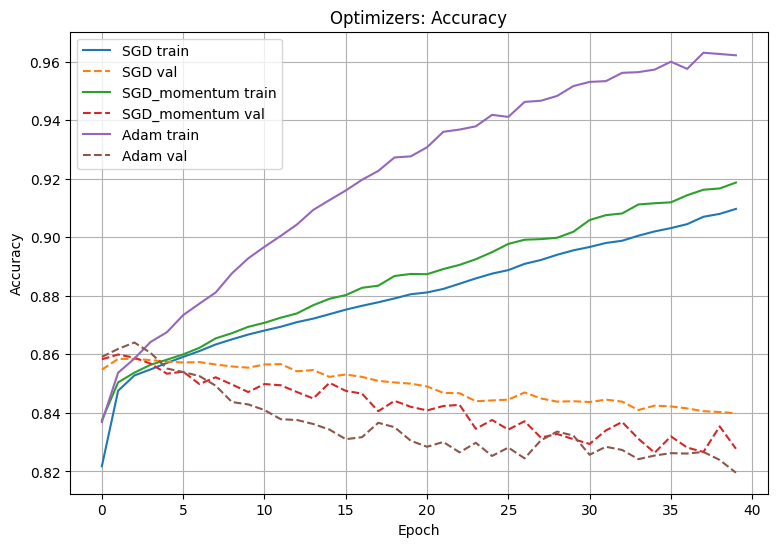


Summary (Part 1):
              train_acc   val_acc  test_acc      time_s
SGD            0.866624  0.839885  0.828443  169.514049
SGD_momentum   0.856621  0.827737  0.816159  152.273727
Adam           0.857410  0.819547  0.812747  173.055195


In [6]:
import matplotlib.pyplot as plt
import time
import tensorflow as tf

def plot_history(histories, title='Accuracy', key='accuracy'):
    plt.figure(figsize=(9,6))
    for name, hist in histories.items():
        plt.plot(hist.history[key], label=f'{name} train')
        plt.plot(hist.history['val_' + key], label=f'{name} val', linestyle='--')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

print('\n=== Part 1: Optimizers comparison ===')

opt_results = {}
histories = {}

optimizers = [ ('SGD', 'sgd'), ('SGD_momentum', 'sgd_mom'), ('Adam', 'adam') ]
EPOCHS = 40
BATCH = 32

for name, opt_key in optimizers:
    print('\nTraining with', name)
    tf.keras.backend.clear_session()
    model = build_model(hidden_units=[128,64], l2_reg=0.0, dropout_rate=0.0)
    compile_model(model, optimizer_name=opt_key)
    history, elapsed = train_model(
        model, X_train_p, y_train, X_val_p, y_val,
        epochs=EPOCHS, batch_size=BATCH, verbose=2
    )
    histories[name] = history
    scores = evaluate_model(model, X_train_p, y_train, X_val_p, y_val, X_test_p, y_test)
    opt_results[name] = {**scores, 'time_s': elapsed}
    print(f"{name} -> train_acc: {scores['train_acc']:.4f}, "
          f"val_acc: {scores['val_acc']:.4f}, "
          f"test_acc: {scores['test_acc']:.4f}, "
          f"time: {elapsed:.1f}s")

# plot accuracy curves
plot_history(histories, title='Optimizers: Accuracy', key='accuracy')

print('\nSummary (Part 1):')
print(pd.DataFrame(opt_results).T)


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [8]:


print('\n=== Part 2: Batch size experiments ===')
batch_results = {}
BATCH_SIZES = [1, 32, 128, 1024]
EPOCHS2 = 30

for bs in BATCH_SIZES:
    print('\nTraining with batch size =', bs)
    tf.keras.backend.clear_session()
    model = build_model(hidden_units=[128,64])
    compile_model(model, optimizer_name='adam')
    history, elapsed = train_model(model, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS2, batch_size=bs, verbose=2)
    scores = evaluate_model(model, X_train_p, y_train, X_val_p, y_val, X_test_p, y_test)
    batch_results[bs] = {**scores, 'time_s': elapsed}
    print('bs', bs, '-> train_acc: {:.4f}, val_acc: {:.4f}, test_acc: {:.4f}, time: {:.1f}s'.format(scores['train_acc'], scores['val_acc'], scores['test_acc'], elapsed))

print('\nSummary (Part 2):')
print(pd.DataFrame(batch_results).T)




=== Part 2: Batch size experiments ===

Training with batch size = 1
Epoch 1/30
34189/34189 - 98s - 3ms/step - accuracy: 0.7606 - loss: 0.5526 - val_accuracy: 0.5246 - val_loss: 68.8117
Epoch 2/30
34189/34189 - 101s - 3ms/step - accuracy: 0.7607 - loss: 0.5519 - val_accuracy: 0.4842 - val_loss: 59.1793
Epoch 3/30
34189/34189 - 135s - 4ms/step - accuracy: 0.7607 - loss: 0.5517 - val_accuracy: 0.5263 - val_loss: 42.7668
Epoch 4/30
34189/34189 - 91s - 3ms/step - accuracy: 0.7607 - loss: 0.5516 - val_accuracy: 0.5876 - val_loss: 37.4519
Epoch 5/30
34189/34189 - 92s - 3ms/step - accuracy: 0.7607 - loss: 0.5514 - val_accuracy: 0.4874 - val_loss: 43.8591
Epoch 6/30
34189/34189 - 91s - 3ms/step - accuracy: 0.7607 - loss: 0.5514 - val_accuracy: 0.4962 - val_loss: 38.4405
Epoch 7/30
34189/34189 - 137s - 4ms/step - accuracy: 0.7607 - loss: 0.5513 - val_accuracy: 0.5319 - val_loss: 34.1113
Epoch 8/30
34189/34189 - 86s - 3ms/step - accuracy: 0.7607 - loss: 0.5513 - val_accuracy: 0.4593 - val_loss:


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---



=== Part 3: Overfitting & Regularization ===

Training large model (no regularization)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
268/268 - 9s - 33ms/step - accuracy: 0.8356 - loss: 0.3734 - val_accuracy: 0.8164 - val_loss: 0.3521
Epoch 2/80
268/268 - 5s - 20ms/step - accuracy: 0.8543 - loss: 0.3120 - val_accuracy: 0.8563 - val_loss: 0.3134
Epoch 3/80
268/268 - 10s - 36ms/step - accuracy: 0.8624 - loss: 0.2959 - val_accuracy: 0.8520 - val_loss: 0.3206
Epoch 4/80
268/268 - 6s - 22ms/step - accuracy: 0.8678 - loss: 0.2838 - val_accuracy: 0.8514 - val_loss: 0.3270
Epoch 5/80
268/268 - 5s - 18ms/step - accuracy: 0.8729 - loss: 0.2716 - val_accuracy: 0.8464 - val_loss: 0.3383
Epoch 6/80
268/268 - 6s - 22ms/step - accuracy: 0.8760 - loss: 0.2595 - val_accuracy: 0.8471 - val_loss: 0.3546
Epoch 7/80
268/268 - 9s - 34ms/step - accuracy: 0.8822 - loss: 0.2469 - val_accuracy: 0.8452 - val_loss: 0.3729
Epoch 8/80
268/268 - 6s - 23ms/step - accuracy: 0.8879 - loss: 0.2345 - val_accuracy: 0.8410 - val_loss: 0.3880
Epoch 9/80
268/268 - 5s - 19ms/step - accuracy: 0.8947 - loss: 0.2213 - val_accuracy: 0.8423 - val_loss

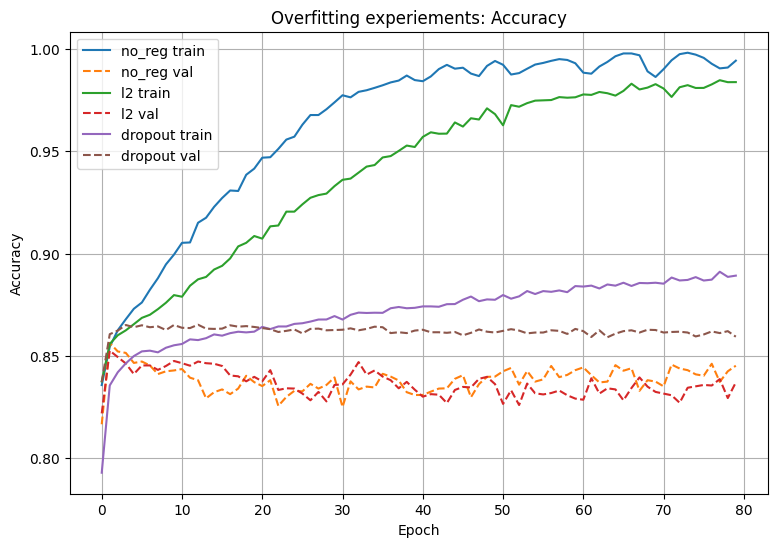


Summary (Part 3):
         train_acc   val_acc  test_acc
large     0.909211  0.845072  0.829535
l2        0.894703  0.836882  0.833629
dropout   0.892275  0.859268  0.850962


In [9]:

print('\n=== Part 3: Overfitting & Regularization ===')

# Large model (likely to overfit)
EPOCHS3 = 80
large_units = [512, 512, 256, 128]

print('\nTraining large model (no regularization)')

tf.keras.backend.clear_session()
model_large = build_model(hidden_units=large_units, l2_reg=0.0, dropout_rate=0.0)
compile_model(model_large, optimizer_name='adam')
hist_large, t_large = train_model(model_large, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS3, batch_size=128, verbose=2)
print('Done large model. Time: {:.1f}s'.format(t_large))

print('\nTraining large model + L2 (weight decay)')

tf.keras.backend.clear_session()
model_l2 = build_model(hidden_units=large_units, l2_reg=1e-4, dropout_rate=0.0)
compile_model(model_l2, optimizer_name='adam')
hist_l2, t_l2 = train_model(model_l2, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS3, batch_size=128, verbose=2)

print('\nTraining large model + Dropout (0.5)')

tf.keras.backend.clear_session()
model_do = build_model(hidden_units=large_units, l2_reg=0.0, dropout_rate=0.5)
compile_model(model_do, optimizer_name='adam')
hist_do, t_do = train_model(model_do, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS3, batch_size=128, verbose=2)

# evaluate all three
res_overfit = {}
for label, m in [('large', model_large), ('l2', model_l2), ('dropout', model_do)]:
    res_overfit[label] = evaluate_model(m, X_train_p, y_train, X_val_p, y_val, X_test_p, y_test)

# plot
plot_history({'no_reg': hist_large, 'l2': hist_l2, 'dropout': hist_do}, title='Overfitting experiements: Accuracy', key='accuracy')

print('\nSummary (Part 3):')
print(pd.DataFrame(res_overfit).T)



## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---


=== Part 4: Early Stopping ===

Training without early stopping (may overfit)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
268/268 - 5s - 19ms/step - accuracy: 0.8306 - loss: 0.3820 - val_accuracy: 0.8556 - val_loss: 0.3396
Epoch 2/200
268/268 - 3s - 11ms/step - accuracy: 0.8564 - loss: 0.3085 - val_accuracy: 0.8600 - val_loss: 0.3067
Epoch 3/200
268/268 - 3s - 12ms/step - accuracy: 0.8626 - loss: 0.2934 - val_accuracy: 0.8593 - val_loss: 0.3075
Epoch 4/200
268/268 - 2s - 6ms/step - accuracy: 0.8674 - loss: 0.2825 - val_accuracy: 0.8576 - val_loss: 0.3115
Epoch 5/200
268/268 - 2s - 9ms/step - accuracy: 0.8712 - loss: 0.2716 - val_accuracy: 0.8550 - val_loss: 0.3191
Epoch 6/200
268/268 - 2s - 8ms/step - accuracy: 0.8767 - loss: 0.2604 - val_accuracy: 0.8485 - val_loss: 0.3276
Epoch 7/200
268/268 - 2s - 6ms/step - accuracy: 0.8842 - loss: 0.2499 - val_accuracy: 0.8471 - val_loss: 0.3332
Epoch 8/200
268/268 - 2s - 8ms/step - accuracy: 0.8891 - loss: 0.2384 - val_accuracy: 0.8478 - val_loss: 0.3424
Epoch 9/200
268/268 - 2s - 9ms/step - accuracy: 0.8934 - loss: 0.2270 - val_accuracy: 0.8483 - val_lo

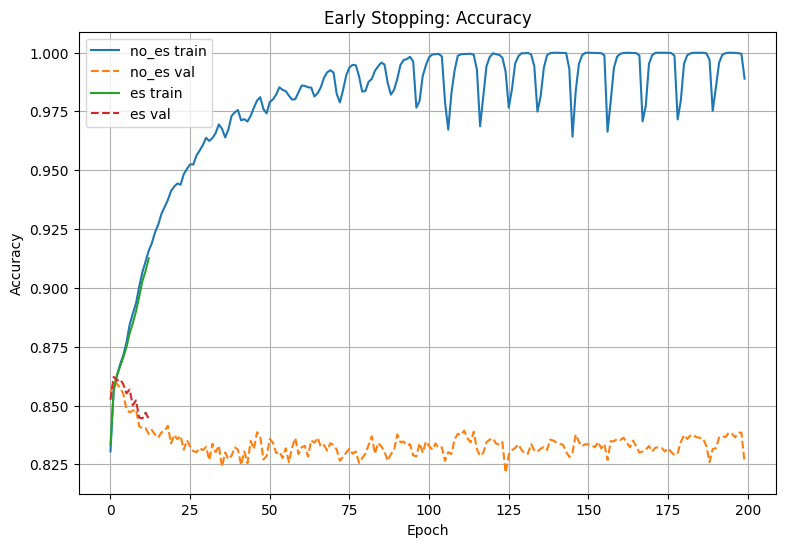


Summary (Part 4):
              train_acc   val_acc  test_acc
no_earlystop   0.890462  0.825826  0.815614
earlystop      0.867501  0.860633  0.853419


In [10]:

print('\n=== Part 4: Early Stopping ===')
EPOCHS4 = 200

# Without early stopping
print('\nTraining without early stopping (may overfit)')

tf.keras.backend.clear_session()
model_es_no = build_model(hidden_units=[256,128,64], l2_reg=0.0, dropout_rate=0.0)
compile_model(model_es_no, optimizer_name='adam')
hist_no_es, t_no_es = train_model(model_es_no, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS4, batch_size=128, verbose=2)

# With early stopping
print('\nTraining with EarlyStopping (patience=10, monitor=val_loss)')

tf.keras.backend.clear_session()
model_es = build_model(hidden_units=[256,128,64], l2_reg=0.0, dropout_rate=0.0)
compile_model(model_es, optimizer_name='adam')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
hist_es, t_es = train_model(model_es, X_train_p, y_train, X_val_p, y_val, epochs=EPOCHS4, batch_size=128, callbacks=[early_stop], verbose=2)

res_es = {
    'no_earlystop': evaluate_model(model_es_no, X_train_p, y_train, X_val_p, y_val, X_test_p, y_test),
    'earlystop': evaluate_model(model_es, X_train_p, y_train, X_val_p, y_val, X_test_p, y_test)
}

print('\nEpochs without ES:', len(hist_no_es.history['loss']))
print('Epochs with ES:', len(hist_es.history['loss']))

# plot
plot_history({'no_es': hist_no_es, 'es': hist_es}, title='Early Stopping: Accuracy', key='accuracy')

print('\nSummary (Part 4):')
print(pd.DataFrame(res_es).T)



## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

In [11]:

print('\n Part 5: Reflection & Summary ')

summary_tables = {
    'optimizers': opt_results,
    'batch_sizes': batch_results,
    'overfitting': res_overfit,
    'early_stopping': res_es
}

# Display summary dataframes
for k, v in summary_tables.items():
    print('\n---', k)
    print(pd.DataFrame(v).T)


print('\nREFLECTION (brief):')
print('- Optimizers: Adam usually converges faster and needs less tuning of LR; SGD (with momentum) can generalize well but may be slower.')
print("- Batch size: small batches (=noisy gradients) can help generalization but are slower per epoch; large batches train faster per epoch but may generalize worse")
print("- Regularization: L2 reduces weights magnitude, Dropout reduces co-adaptation — effectiveness depends on architecture and data; often using both helps")
print("- Early stopping: prevents overfitting by stopping at best validation loss; restores best weights and reduces wasted compute")

print('\nEnd of notebook.\nYou can re-run selected sections to shorten run-time (reduce epochs).')



 Part 5: Reflection & Summary 

--- optimizers
              train_acc   val_acc  test_acc      time_s
SGD            0.866624  0.839885  0.828443  169.514049
SGD_momentum   0.856621  0.827737  0.816159  152.273727
Adam           0.857410  0.819547  0.812747  173.055195

--- batch_sizes
      train_acc   val_acc  test_acc       time_s
1      0.607388  0.601829  0.610345  3297.654190
32     0.863114  0.832514  0.817934   129.516033
128    0.890316  0.843434  0.826669    43.219458
1024   0.896926  0.848621  0.839361    21.009167

--- overfitting
         train_acc   val_acc  test_acc
large     0.909211  0.845072  0.829535
l2        0.894703  0.836882  0.833629
dropout   0.892275  0.859268  0.850962

--- early_stopping
              train_acc   val_acc  test_acc
no_earlystop   0.890462  0.825826  0.815614
earlystop      0.867501  0.860633  0.853419

REFLECTION (brief):
- Optimizers: Adam usually converges faster and needs less tuning of LR; SGD (with momentum) can generalize well but may